# Potentiel field method (2_layers)

In [1]:
import gempy as gp
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#import os
from geometron.geometries import gdf_to_points_gdf
# Setting options
np.random.seed(1515)
pd.set_option('precision', 2)

Not subsurface compatibility available


/home/su530201/.local/share/virtualenvs/gsdma_2021-CLBGPK-k/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Importation of th geopackage into a geodataframe

In [2]:
gdf = gpd.read_file('../../../../data/Parties exploitées - Caillette.gpkg', layer = 'Parties exploitées - Caillette')

Rename of the column "Couche" into "layer"

In [3]:
gdf.rename({'Couche ': 'layer'}, axis=1, inplace=True)

Research and selection of the 2 main layers because others are less important and too isolated

In [4]:
gdf = gdf.query('layer=="10 Paumes" or layer=="Caillette"')

Creation of a rectangle which includes the points of the 2 layers

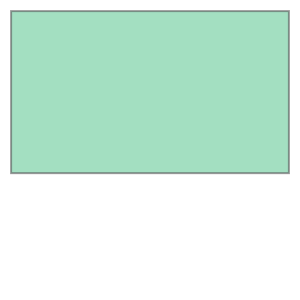

In [5]:
from shapely.geometry import Polygon
aoi = Polygon([[153400, 122500], [156400, 122500], [156400, 124250], [153400, 124250], [153400, 122500]])
aoi

Clip of the rectangle on the geodataframe

In [6]:
gdf = gpd.clip(gdf, aoi, True) 

Plot of the geodataframe

<AxesSubplot:>

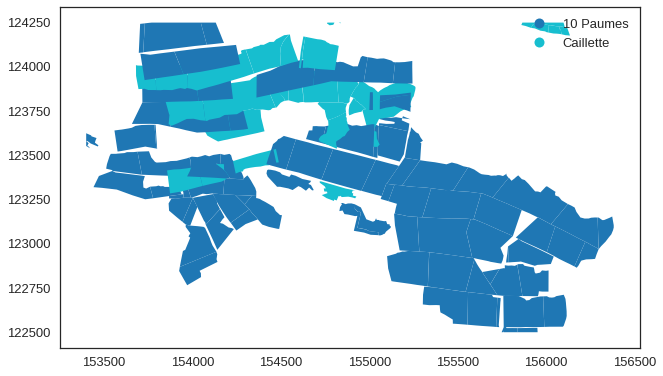

In [7]:
gdf.plot(column='layer', legend=True)

Creation of a geodatframe simplier than the first one with only the half of the points because it's enough

In [8]:
gdf['geometry'] = gdf['geometry'].apply(lambda geom: geom.simplify(50))

Plot of the second geodataframe

<AxesSubplot:>

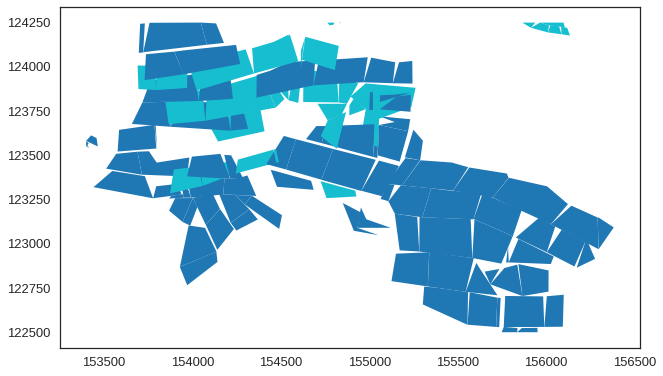

In [9]:
gdf.plot(column='layer')

Creation of the points from the geodataframe

In [10]:
gdf_points = gdf_to_points_gdf(gdf, columns=['layer'])
gdf_points.tail()

,geometry,layer
582,POINT Z (154134.301 124245.350 -682.700),10 Paumes
583,POINT Z (154178.849 124135.168 -731.600),10 Paumes
584,POINT Z (154081.716 124124.788 -735.500),10 Paumes
585,POINT Z (154047.816 124250.000 -673.213),10 Paumes
586,POINT Z (154134.301 124245.350 -682.700),10 Paumes


Conversion of the geodateframe into a csv file

In [11]:
gdf.to_csv('Parties exploitées - Caillette.csv')

Creation of the model with boundaries

In [12]:
geo_model = gp.create_model('Parties exploitées - Caillette')
geo_model = gp.init_data(geo_model, extent=[gdf_points.bounds.minx.min(), gdf_points.bounds.maxx.max(), gdf_points.bounds.miny.min(),  gdf_points.bounds.maxy.max(), gdf_points.geometry.z.min(), gdf_points.geometry.z.max()], resolution=[100, 100, 40])

Active grids: ['regular']


In [13]:
gp.set_interpolator(geo_model, theano_optimizer='fast_compile', verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                     values
range              3452.03
$C_o$            283725.98
drift equations        [3]


Creation of the surfaces in the right order (from the younger to the older)

In [14]:
geo_model.add_surfaces(['Caillette', '10 Paumes','basement'])

,surface,series,order_surfaces,color,id
0,Caillette,Default series,1,#015482,1
1,10 Paumes,Default series,2,#9f0052,2
2,basement,Default series,3,#ffbe00,3


Creation of the surfaces points passing through each point for each layer

In [15]:
for idx, row in gdf_points.iterrows():
    geo_model.add_surface_points(row.geometry.x, row.geometry.y,row.geometry.z, surface=row.layer)

In [16]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Caillette,Default series,1,#015482,1
1,10 Paumes,Default series,2,#9f0052,2
2,basement,Default series,3,#ffbe00,3


Creation of the orientation of each points and layers

Here we don't have enough time to find how calculate the right orientation from points and surface point so we put a vertical orientation

In [17]:
for idx, row in gdf_points.iterrows():
    geo_model.add_orientations(row.geometry.x, row.geometry.y,row.geometry.z, surface=row.layer, pole_vector=(0, 0, 1))

In [18]:
geo_model.orientations

,X,Y,Z,G_x,G_y,G_z,smooth,surface
28,154725.03,123353.22,-713.00,0.0,0.0,1.0,0.01,Caillette
29,154920.55,123300.40,-703.00,0.0,0.0,1.0,0.01,Caillette
30,154927.30,123267.17,-707.00,0.0,0.0,1.0,0.01,Caillette
31,154758.67,123257.79,-715.00,0.0,0.0,1.0,0.01,Caillette
32,154725.03,123353.22,-713.00,0.0,0.0,1.0,0.01,Caillette
187,156084.45,124228.80,-509.45,0.0,0.0,1.0,0.01,Caillette
188,156119.30,124219.19,-509.30,0.0,0.0,1.0,0.01,Caillette
189,156134.48,124176.88,-530.60,0.0,0.0,1.0,0.01,Caillette
190,156086.55,124184.08,-528.50,0.0,0.0,1.0,0.01,Caillette
191,156084.45,124228.80,-509.45,0.0,0.0,1.0,0.01,Caillette


Compilation of the model

In [19]:
gp.compute_model(geo_model)


Lithology ids 
  [3. 3. 2. ... 1. 1. 1.] 

Plotting of the model

/home/su530201/.local/share/virtualenvs/gsdma_2021-CLBGPK-k/lib/python3.8/site-packages/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


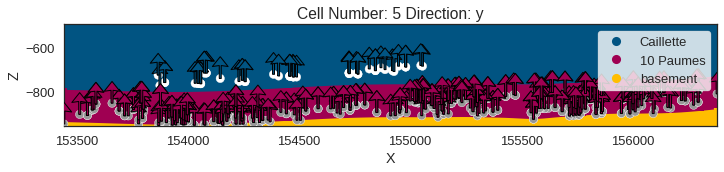

In [20]:
gp.plot_2d(geo_model, cell_number=5, legend='force')


Plot the model in 3d

Exportation of the model in vtk format